In [10]:
# some matplotlib styling
from matplotlib import rc
import matplotlib.pyplot as plt

#from scipy.stats import gaussian_kde

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

plt.style.use('seaborn-notebook')
plt.rcParams['image.cmap'] = 'Reds'
plt.rcParams['patch.linewidth'] = '0.5'
plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams['axes.titlesize'] = '18'
plt.rcParams['axes.labelsize'] = '18'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '12'
plt.rcParams['ytick.labelsize'] = '12'

In [11]:
import numpy as np
import random
from sklearn import metrics
import pandas as pd
import seaborn as sns
import math
from functools import reduce
from matplotlib.gridspec import GridSpec
import copy

In [12]:
illiniblue = (0/255,62/255,126/255)
illiniorange = (245/255,128/255,39/255)
kitgreen = (50/255,161/255,137/255)

In [55]:
n = 1000

data = pd.DataFrame(data={
    "y" : [1 if x < n/2 else 0 for x in range(n)],
    "x" : [np.random.normal(loc=70, scale=4) if x < n/2 else np.random.normal(loc=65, scale=3.5) for x in range(n)],
})
data["x"] = (data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())

In [56]:
alpha = 0.5
nDim = 2
sliceSize = alpha**(1.0 / (nDim - 1.0))
col1 = illiniblue
col2 = illiniorange
choice = 1
t = "mixed"

In [57]:
if(choice):
    ref = "x"
    other = "y"
else:
    ref= "y"
    other = "x"
    
ry = np.random.randint(0,2)
sliceStart = np.random.randint(0,n - sliceSize*n)
rx1 = sorted(data["x"])[sliceStart]
rx2 = sorted(data["x"])[int(sliceStart + sliceSize*n)]

if(choice):
    inslide = (data[other] == ry)
    ouslide = np.logical_not(inslide)
else:
    inslide = ((data[other] > rx1) & (data[other] < rx2))  
    ouslide = np.logical_not(inslide)

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append('w')

<IPython.core.display.Javascript object>


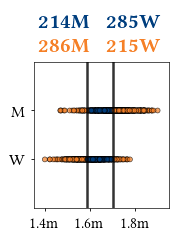

In [58]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(3,4))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

choice = 0

ref= "y"
other = "x"
#ref_marg = ax_marg_y
other_marg = ax_marg_x

ry = np.random.randint(0,2)
sliceStart = np.random.randint(0,n - sliceSize*n)
rx1 = sorted(data["x"])[sliceStart]
rx2 = sorted(data["x"])[int(sliceStart + sliceSize*n)]

if(choice):
    inslide = (data[other] == ry)
    ouslide = np.logical_not(inslide)
else:
    inslide = ((data[other] > rx1) & (data[other] < rx2))  
    ouslide = np.logical_not(inslide)

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append('w')

    
x_data = data["x"] * (1.9 - 1.4) + 1.4
ax_joint.scatter(x_data, data["y"],color=colors, edgecolor='black', linewidth=0.8, s=35, alpha=0.7)
ax_joint.set_ylim((-1,2))
ax_joint.set_xlim((1.35,1.95))
ax_joint.set_yticks([0,1])
ax_joint.set_yticklabels(["W","M"], size=20)
#ax_joint.set_xlabel("height (meters)")
ax_joint.set_xticks([1.4, 1.6, 1.8])
ax_joint.set_xticklabels(["1.4m","1.6m", "1.8m"], fontsize=18)
#ax_joint.set_ylabel("sex")

ax_joint.plot([rx1  * (1.9 - 1.4) + 1.4,rx1  * (1.9 - 1.4) + 1.4], [-1,2], 'k-', c="Black", alpha=0.8, linewidth=3)
ax_joint.plot([rx2  * (1.9 - 1.4) + 1.4,rx2  * (1.9 - 1.4) + 1.4], [-1,2], 'k-', c="Black", alpha=0.8, linewidth=3)

counts = data[data['y'] == 0]["labels"].value_counts()
ax_joint.text(1.67,2.7,r'\textbf{%sW}'%counts[1], color=illiniblue, size=25)
ax_joint.text(1.67,2.2,r'\textbf{%sW}'%counts[2], color=illiniorange, size=25)

counts = data[data['y'] == 1]["labels"].value_counts()
ax_joint.text(1.37,2.7,r'\textbf{%sM}'%counts[1], color=illiniblue, size=25)
ax_joint.text(1.37,2.2,r'\textbf{%sM}'%counts[2], color=illiniorange, size=25)
    
other_marg.remove()
#ref_marg.axis('off')

plt.tight_layout()

plt.savefig("%s_%s_2D_hetero1.pdf"%(t, choice), format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_%s_2D_hetero1.png"%(t, choice), format="png")

<IPython.core.display.Javascript object>


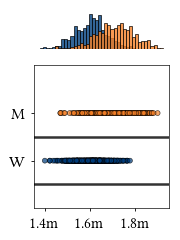

In [61]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(3,4))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

choice = 1

ref = "x"
other = "y"
ref_marg = ax_marg_x
#other_marg = ax_marg_y


ry = np.random.randint(0,2)
sliceStart = np.random.randint(0,n - sliceSize*n)
rx1 = sorted(data["x"])[sliceStart]
rx2 = sorted(data["x"])[int(sliceStart + sliceSize*n)]

if(choice):
    inslide = (data[other] == ry)
    ouslide = np.logical_not(inslide)
else:
    inslide = ((data[other] > rx1) & (data[other] < rx2))  
    ouslide = np.logical_not(inslide)

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append('w')

    
x_data = data["x"] * (1.9 - 1.4) + 1.4
ax_joint.scatter(x_data, data["y"],color=colors, edgecolor='black', linewidth=0.8, s=35, alpha=0.7)
ax_joint.set_ylim((-1,2))
ax_joint.set_xlim((1.35,1.95))
ax_joint.set_yticks([0,1])
ax_joint.set_yticklabels(["W","M"], size=20)
#ax_joint.set_xlabel("height (meters)")
ax_joint.set_xticks([1.4, 1.6, 1.8])
ax_joint.set_xticklabels(["1.4m","1.6m", "1.8m"], fontsize=18)
#ax_joint.set_ylabel("sex")

ax_joint.plot([1.35,1.95], [ry-0.5,ry-0.5], 'k-', c="Black", alpha=0.8, linewidth=3)
ax_joint.plot([1.35,1.95], [ry+0.5,ry+0.5], 'k-', c="Black", alpha=0.8, linewidth=3)
#ax_joint.plot([rx1,rx1], [-1,2], 'k-', c="Black", alpha=0.8, linewidth=4)
#ax_joint.plot([rx2,rx2], [-1,2], 'k-', c="Black", alpha=0.8, linewidth=4)

nbins = 40
cond1 = data[data['labels'] == 1][ref]
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))
ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
             color=col1, linewidth=1, edgecolor="black")

nbins = 40
cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))
ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
        color=col2, linewidth=1, edgecolor="black")
    
#other_marg.remove()
ref_marg.set_xticklabels([])
ref_marg.axis('off')

plt.tight_layout()

plt.savefig("%s_%s_2D_hetero2.pdf"%(t, choice), format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_%s_2D_hetero2.png"%(t, choice), format="png")

<IPython.core.display.Javascript object>


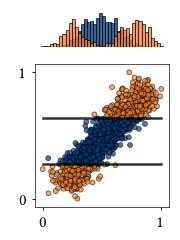

In [65]:
a = np.random.uniform(size=n)
data = pd.DataFrame(data={
    "x" : a + np.random.normal(size=1000,scale=0.1),
    "y" : a + np.random.normal(size=1000,scale=0.1)
})
data["x"] = (data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y"] = (data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())

alpha = 0.5
nDim = 2
sliceSize = alpha**(1.0 / (nDim - 1.0))
col1 = illiniblue
col2 = illiniorange
choice = 1
t = "mixed"

ref = "x"
other = "y"
    

yindex = np.random.randint(0, data.shape[0]-1 - data.shape[0]*sliceSize)
xindex = np.random.randint(0, data.shape[0]-1 - data.shape[0]*alpha)
ry = sorted(data["y"])[yindex]
rx = sorted(data["x"])[xindex]
rye = sorted(data["y"])[int(yindex+data.shape[0]*sliceSize)]
rxe = sorted(data["x"])[int(xindex+data.shape[0]*alpha)]

inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide)

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append('w')
        
        
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(3,4))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

choice = 1

ref = "x"
other = "y"
ref_marg = ax_marg_x
#other_marg = ax_marg_y

x_data = data["x"] 
ax_joint.scatter(x_data, data["y"],color=colors, edgecolor='black', linewidth=0.8, s=35, alpha=0.7)
#ax_joint.set_ylim((-1,2))
#ax_joint.set_xlim((1.35,1.95))
ax_joint.set_yticks([0,1])
ax_joint.set_yticklabels(["0","1"], size=20)
ax_joint.set_xticks([0,1])
ax_joint.set_xticklabels(["0","1"], size=20)
#ax_joint.set_yticklabels(["W","M"], size=20)
a#x_joint.set_xlabel("height (meters)")
#ax_joint.set_ylabel("sex")

ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
#ax_joint.plot([rx1,rx1], [-1,2], 'k-', c="Black", alpha=0.8, linewidth=4)
#ax_joint.plot([rx2,rx2], [-1,2], 'k-', c="Black", alpha=0.8, linewidth=4)

nbins = 40
cond1 = data[data['labels'] == 1][ref]
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))
ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
             color=col1, linewidth=1, edgecolor="black")

nbins = 40
cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))
ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
        color=col2, linewidth=1, edgecolor="black")
    
#other_marg.remove()
ref_marg.set_xticklabels([])
ref_marg.axis('off')

plt.tight_layout()

plt.savefig("%s_%s_2D_homo1.pdf"%(t, choice), format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_%s_2D_homo1.png"%(t, choice), format="png")

In [66]:
%matplotlib notebook

n = 1000

#+ np.random.normal(size=1,scale=0.1)[0]
x = [str(x%6) for x in range(n)]
random.shuffle(x)
y = [str(x%6) for x in range(n)] #  + (x%16)/20 - 0.4
#random.shuffle(y)
data = pd.DataFrame(data={
    "y" : y,
    "x" : x,
})

cm=metrics.confusion_matrix(data["x"],data["y"])



<IPython.core.display.Javascript object>


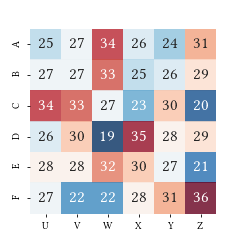

In [67]:
df_cm = pd.DataFrame(cm, index = [i for i in "ABCDEF"],
                  columns = [i for i in "UVWXYZ"])
plt.figure(figsize = (4,4))
fig = sns.heatmap(df_cm, annot=True, cbar=None, cmap="RdBu_r", alpha=0.8, annot_kws={"fontsize":20})

In [68]:
sampled = random.sample([0,1,2,3,4,5],3)
sampled = [5, 0, 3]

In [69]:
choosen = copy.deepcopy(cm)
for i,x in enumerate(choosen):
    if(i%6 in sampled):
        choosen[i] = 1
    else:
        choosen[i] = 0
choosen = choosen.T

In [70]:
from matplotlib.colors import LinearSegmentedColormap
colormap = LinearSegmentedColormap.from_list("lol", [illiniblue, illiniorange], N=2)

In [71]:
cm

array([[25, 27, 34, 26, 24, 31],
       [27, 27, 33, 25, 26, 29],
       [34, 33, 27, 23, 30, 20],
       [26, 30, 19, 35, 28, 29],
       [28, 28, 32, 30, 27, 21],
       [27, 22, 22, 28, 31, 36]])

<IPython.core.display.Javascript object>


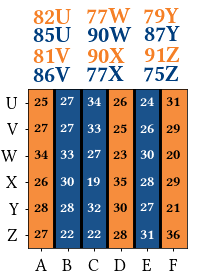

In [76]:
#fig, ax = plt.subplots()

fig = plt.figure(figsize=(3,4))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

plt.sca(ax_joint)

choice = 0

ref= "y"
other = "x"
#ref_marg = ax_marg_y
other_marg = ax_marg_x


im = ax_joint.imshow(choosen, interpolation='nearest', cmap=colormap, alpha=0.9)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax_joint.text(j, i, r'\textbf{%s}'%cm[i, j],
                ha="center", va="center",
                color="black" if choosen[i,j] else "white", fontsize=15)
        
for sample in {0,1,2,3,4,5} - set(sampled):
    plt.axvline(x=sample-0.5, c="Black", alpha=1.0, linewidth=3)
    plt.axvline(x=sample+0.5, c="Black", alpha=1.0, linewidth=3)
    
plt.xticks([0,1,2,3,4,5], ["A", "B", "C", "D", "E", "F"], fontsize=18)
plt.yticks([0,1,2,3,4,5], ["U", "V", "W", "X", "Y", "Z"], fontsize=18)

other_marg.remove()
#ref_marg.set_xticklabels([])
#ref_marg.axis('off')

keys = ["U", "V", "W", "X", "Y", "Z"]
bvals = {x:0 for x in keys}
yvals = {x:0 for x in keys}
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        #print("processing  key %s : %s at position %s, %s"%(keys[i], cm[i,j], i, j))
        if(j in sampled):
            #print("addint in yvals")
            yvals[keys[i]] = yvals[keys[i]] + cm[i,j]
        else:
            #print("addint in bvals")
            bvals[keys[i]] = bvals[keys[i]] + cm[i,j]


upsize = 23
ax_joint.text(-0.3,-2.3, r'\textbf{%sU}'%bvals["U"], color=illiniblue, size=upsize)
ax_joint.text(-0.3,-3.0,r'\textbf{%sU}'%yvals["U"], color=illiniorange, size=upsize)

ax_joint.text(-0.3,-0.8, r'\textbf{%sV}'%bvals["V"], color=illiniblue, size=upsize)
ax_joint.text(-0.3,-1.5,r'\textbf{%sV}'%yvals["V"], color=illiniorange, size=upsize)

ax_joint.text(1.75,-2.3, r'\textbf{%sW}'%bvals["W"], color=illiniblue, size=upsize)
ax_joint.text(1.75,-3.0,r'\textbf{%sW}'%yvals["W"], color=illiniorange, size=upsize)

ax_joint.text(1.75,-0.8, r'\textbf{%sX}'%bvals["X"], color=illiniblue, size=upsize)
ax_joint.text(1.75,-1.5,r'\textbf{%sX}'%yvals["X"], color=illiniorange, size=upsize)

ax_joint.text(3.9,-2.3, r'\textbf{%sY}'%bvals["Y"], color=illiniblue, size=upsize)
ax_joint.text(3.9,-3.0, r'\textbf{%sY}'%yvals["Y"], color=illiniorange, size=upsize)

ax_joint.text(3.9,-0.8, r'\textbf{%sZ}'%bvals["Z"], color=illiniblue, size=upsize)
ax_joint.text(3.9,-1.5, r'\textbf{%sZ}'%yvals["Z"], color=illiniorange, size=upsize)

plt.savefig("%s_%s_2D_homo2.pdf"%(t, choice), format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_%s_2D_homo2.png"%(t, choice), format="png")

In [126]:
cm

array([[25, 32, 31, 32, 27, 20],
       [24, 29, 25, 32, 31, 26],
       [32, 25, 32, 27, 25, 26],
       [30, 26, 30, 27, 22, 32],
       [30, 30, 27, 21, 30, 28],
       [26, 25, 22, 28, 31, 34]])

In [187]:
sampled

[4, 2, 1]

In [200]:
yvals

{'A': 90, 'B': 85, 'C': 82, 'D': 78, 'E': 87, 'F': 78}

In [201]:
bvals

{'A': 77, 'B': 82, 'C': 85, 'D': 89, 'E': 79, 'F': 88}

In [141]:
cm.shape[0]

6

In [142]:
cm.shape[1]

6

In [160]:
cm[0,1]

32